In [122]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
import math
import researchpy as rp
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import scipy.stats as scp

In [2]:
#Reading in data from Social Progress Index (2015)

SPIndex = pd.read_excel(
    '/Users/jborri/Desktop/Datasets/2015 Social Progress Index Data.xlsx',
    index_col='Country',
    na_values=['NA']
      )
SPIndex.head()

,Country Code,Social Progress Index,Basic Human Needs,Foundations of Wellbeing,Opportunity,Nutrition and Basic Medical Care,Water and Sanitation,Shelter,Personal Safety,Access to Basic Knowledge,...,Number of globally ranked universities,Depth of food deficit - capped,Household air pollution attributable deaths - bucketed,Adult literacy rate - capped,Lower secondary school enrollment - capped,Upper secondary school enrollment - capped,Gender parity in secondary enrollment - capped,Mobile telephone subscriptions - capped,Greenhouse gas emissions - bucketed,Number of globally ranked universities - bucketed
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,35.40,37.17,46.50,22.51,67.99,31.73,21.48,27.50,48.36,...,0,155.0,1,38.15612,63.464008,42.936451,0.55338,70.004910,2,0
Albania,ALB,68.19,80.71,73.64,50.23,97.67,88.30,69.14,67.74,92.56,...,0,8.0,4,97.62414,92.562828,82.529991,0.95176,100.000000,2,0
Algeria,DZA,60.66,78.88,66.22,36.87,94.41,81.66,70.92,68.54,89.30,...,0,24.0,6,80.19891,100.000000,62.025249,1.00000,100.000000,2,0
Angola,AGO,40.00,41.27,52.20,26.51,57.90,34.57,30.69,41.93,54.84,...,0,114.0,4,71.14099,39.163239,22.938231,0.64823,61.873297,1,0
Argentina,ARG,73.08,80.51,73.57,65.17,96.81,96.56,63.81,64.86,95.29,...,16,8.0,6,98.08516,100.000000,70.470871,1.00000,100.000000,2,4


In [3]:
#Reading in data from Human Development Index (United Nations- 2015)

UNHDIndex = pd.read_excel(
    '/Users/jborri/Desktop/Datasets/HumanDevelopment.xlsx',
    index_col='Country',
    na_values=['NA']
)
UNHDIndex.head()

,HDI Rank,Human Development Index (HDI),Life Expectancy at Birth,Expected Years of Education,Mean Years of Education,Gross National Income (GNI) per Capita,GNI per Capita Rank Minus HDI Rank
Country,,,,,,,
Norway,1,0.944,81.6,17.5,12.6,64992,5
Australia,2,0.935,82.4,20.2,13.0,42261,17
Switzerland,3,0.930,83.0,15.8,12.8,56431,6
Denmark,4,0.923,80.2,18.7,12.7,44025,11
Netherlands,5,0.922,81.6,17.9,11.9,45435,9


In [4]:
#Reading in data from World Happiness Report (2019)

WHRIndex = pd.read_excel(
    '/Users/jborri/Desktop/Datasets/WHINDEX2019.xls',
    index_col='Country',
    na_values=['NA']
)
WHRIndex.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904,0.364666,...,NaN,NaN,0.290681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338,...,NaN,0.303250,0.456174,NaN,NaN,NaN,0.243243,0.232000,NaN,NaN
Algeria,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,0.292946,NaN,...,NaN,0.276000,0.667872,NaN,NaN,NaN,NaN,0.107644,NaN,0.179286
Argentina,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352,...,NaN,0.460938,0.405356,NaN,0.270073,0.223553,0.170844,0.150154,0.174058,0.193531
Armenia,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828,...,NaN,0.319250,0.406403,NaN,NaN,NaN,0.235000,NaN,NaN,0.109136


In [5]:
#Reading in data from Multidimensional Poverty Index (United Nations 2015)

MPIndex = pd.read_csv(
    '/Users/jborri/Desktop/Datasets/multidimensional_poverty.csv',
    index_col='Country',
    na_values=['NA']
)
MPIndex.head()

,Year and Survey,"Multidimensional Poverty Index (MPI, HDRO)",MPI HDRO Percent,"Multidimensional Poverty Index (MPI, 2010)",MPI 2010 Percent,Population in Multidimensional Poverty,Intensity of Deprivation,Education Deprivation,Health Deprivation,Living Standards,Population Below National Poverty Line,Population Below $1.25 per Day
Country,,,,,,,,,,,,
Afghanistan,2010/2011 M,0.293,58.8,0.353,66.2,"17,116",49.9,45.6,19.2,35.2,35.8,NaN
Albania,2008/2009 D,0.005,1.2,0.005,1.4,38,38.3,22.4,47.1,30.5,14.3,0.5
Argentina,2005 N,0.015,3.7,0.011,2.9,"1,438",39.1,38.2,27.8,34.0,NaN,1.4
Armenia,2010 D,0.002,0.6,0.001,0.3,18,37.0,3.4,87.8,8.7,32.0,1.8
Azerbaijan,2006 D,0.009,2.4,0.021,5.3,210,38.2,20.0,50.7,29.3,5.3,0.3


In [6]:
#Merging DataFrames

IndexTotal = pd.concat([
    SPIndex,
    UNHDIndex,
    WHRIndex,
    MPIndex
    ],
    axis=1
    )
IndexTotal.shape

(212, 121)

In [7]:
IndexTotal.head()

,Country Code,Social Progress Index,Basic Human Needs,Foundations of Wellbeing,Opportunity,Nutrition and Basic Medical Care,Water and Sanitation,Shelter,Personal Safety,Access to Basic Knowledge,...,MPI HDRO Percent,"Multidimensional Poverty Index (MPI, 2010)",MPI 2010 Percent,Population in Multidimensional Poverty,Intensity of Deprivation,Education Deprivation,Health Deprivation,Living Standards,Population Below National Poverty Line,Population Below $1.25 per Day
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,35.40,37.17,46.50,22.51,67.99,31.73,21.48,27.50,48.36,...,58.8,0.353,66.2,"17,116",49.9,45.6,19.2,35.2,35.8,NaN
Albania,ALB,68.19,80.71,73.64,50.23,97.67,88.30,69.14,67.74,92.56,...,1.2,0.005,1.4,38,38.3,22.4,47.1,30.5,14.3,0.5
Algeria,DZA,60.66,78.88,66.22,36.87,94.41,81.66,70.92,68.54,89.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,AGO,40.00,41.27,52.20,26.51,57.90,34.57,30.69,41.93,54.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,ARG,73.08,80.51,73.57,65.17,96.81,96.56,63.81,64.86,95.29,...,3.7,0.011,2.9,"1,438",39.1,38.2,27.8,34.0,NaN,1.4


In [153]:
#Creating Linear Model of Merged Data

Y = IndexTotal['Social support'] # A measure of Quality of Community
X = IndexTotal[['Human Development Index (HDI)',
                'Life Ladder',
                'Community safety net',
                'Tolerance for immigrants',
                #'MPI HDRO Percent'


]]
X = sm.add_constant(X)
model0 = sm.OLS(Y, X, missing='drop').fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:         Social support   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     143.7
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           1.43e-43
Time:                        00:44:10   Log-Likelihood:                 192.50
No. Observations:                 119   AIC:                            -375.0
Df Residuals:                     114   BIC:                            -361.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [155]:
X.corr()

,const,Human Development Index (HDI),Life Ladder,Community safety net,Tolerance for immigrants
const,NaN,NaN,NaN,NaN,NaN
Human Development Index (HDI),NaN,1.000000,0.780557,0.642230,0.181852
Life Ladder,NaN,0.780557,1.000000,0.654206,0.412846
Community safety net,NaN,0.642230,0.654206,1.000000,0.273635
Tolerance for immigrants,NaN,0.181852,0.412846,0.273635,1.000000


In [125]:
# Checking on colinearity
corrtab, corrsig = scp.stats.pearsonr(IndexTotal['Social support'].dropna(), IndexTotal['Life Ladder'].dropna())
corrtab

/var/folders/jt/bdkqy39970s3tmsfrwm8j1yc0000gn/T/ipykernel_11663/685493994.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  corrtab, corrsig = scp.stats.pearsonr(IndexTotal['Social support'].dropna(), IndexTotal['Life Ladder'].dropna())


0.71926734550878

In [126]:
corrsig

6.04493633414538e-23

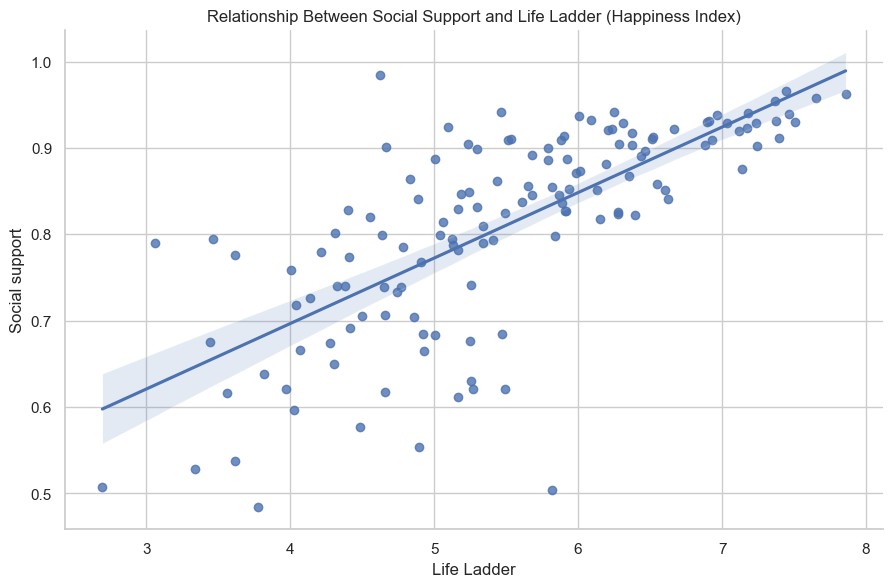

In [149]:
q = sns.lmplot(data=IndexTotal, x='Life Ladder', y='Social support')
q.fig.set_figwidth(10)
q.fig.set_figheight(6)
plt.title('Relationship Between Social Support and Life Ladder (Happiness Index)')
plt.show()

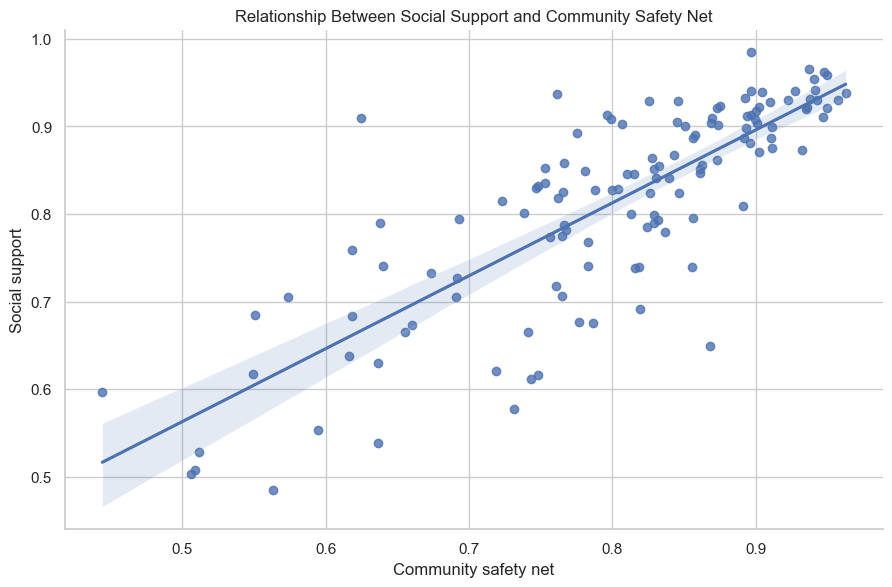

In [144]:
q = sns.lmplot(data=IndexTotal, x='Community safety net', y='Social support')
q.fig.set_figwidth(10)
q.fig.set_figheight(6)
plt.title('Relationship Between Social Support and Community Safety Net')
plt.show()

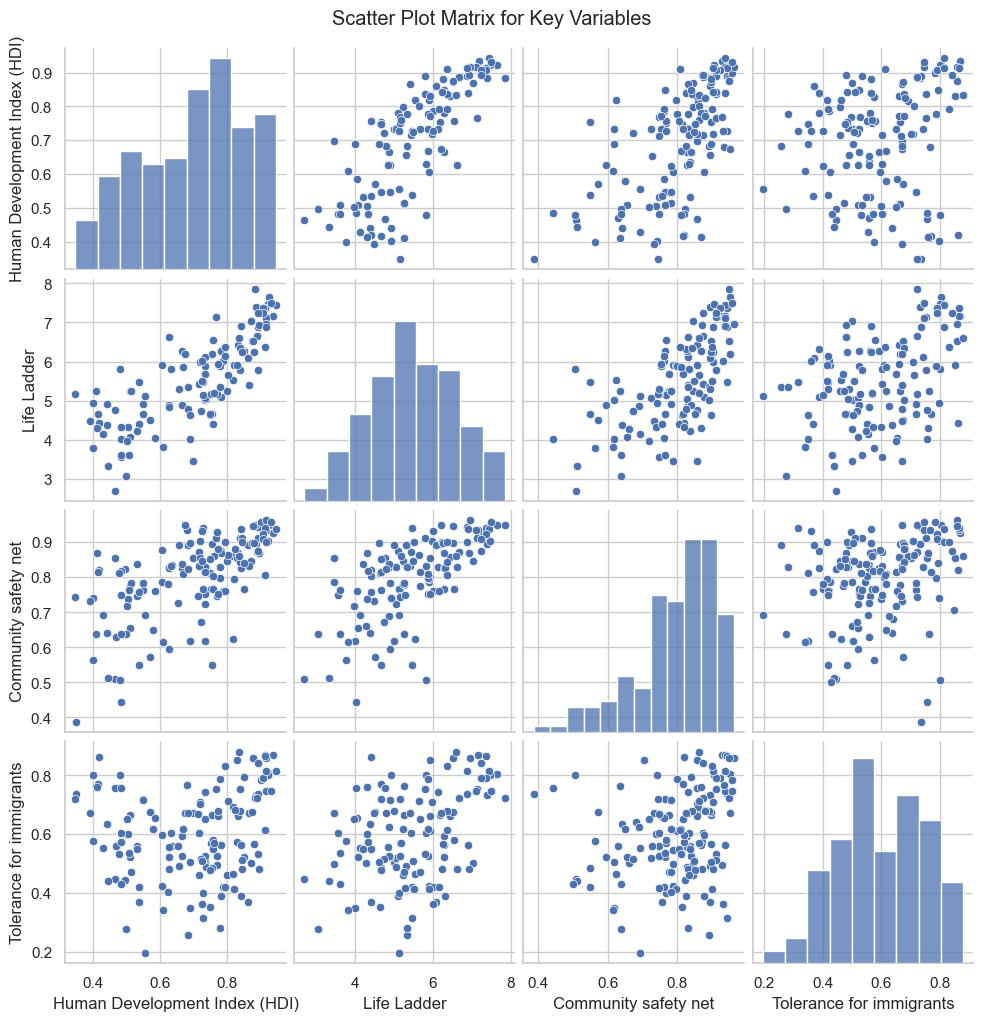

In [154]:
sns.pairplot(IndexTotal[['Human Development Index (HDI)',
                'Life Ladder',
                'Community safety net',
                'Tolerance for immigrants']])
plt.suptitle('Scatter Plot Matrix for Key Variables', y=1.02)
plt.show()